<a href="https://colab.research.google.com/github/AlexisCordeiro/aulacienciadedados/blob/main/Atividades_bases_nuvem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
from numpy.random import default_rng
rng = default_rng()
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
base = pd.read_excel('Clientes.xlsx')
tabela = pd.read_csv('Women Dresses Reviews Dataset .csv')
tabela

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
0,0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1
1,1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1
2,2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0
3,3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1
4,4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,44,General Petite,Dresses,Dresses,1081,Love it!,I oot this dress in the blue. it fits great--h...,0,5,1
23482,23482,39,General,Dresses,Dresses,1110,Great piece,I was very patient with this dress. i was wait...,1,5,1
23483,23483,29,General Petite,Tops,Knits,862,So soft and flattering,"The deep v doesn't gape, and flatters the neck...",0,5,1
23484,23484,57,General,Dresses,Dresses,1082,Another winner from isabella sinclair,"I saw this dress online this morning, went int...",10,5,1


In [ ]:
base1 = base[['feedback']]
base1

,feedback
0,"Gostei muito do atendimento, recomendo!"
1,"O serviço foi satisfatório, mas poderia ser me..."
2,Fiquei muito satisfeita com o serviço prestado.
3,Achei o atendimento bastante confuso e demorado.
4,Fui muito bem atendida e o serviço foi ótimo!
...,...
66,"O serviço prestado foi razoável, mas a espera ..."
67,Fui muito bem atendida e o serviço prestado fo...
68,"O serviço prestado foi razoável, mas a espera ..."
69,Fui muito bem atendida e o serviço prestado fo...


In [ ]:
tabelabruno = tabela[['review_text']]
tabelabruno

In [ ]:
tabelabruno.columns = ['feedback']


In [ ]:
basejuntas = base1.append(tabelabruno)
basejuntas

<ipython-input-67-1e16bf006f43>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  basejuntas = base1.append(tabelabruno)


,feedback
0,"Gostei muito do atendimento, recomendo!"
1,"O serviço foi satisfatório, mas poderia ser me..."
2,Fiquei muito satisfeita com o serviço prestado.
3,Achei o atendimento bastante confuso e demorado.
4,Fui muito bem atendida e o serviço foi ótimo!
...,...
23481,I oot this dress in the blue. it fits great--h...
23482,I was very patient with this dress. i was wait...
23483,"The deep v doesn't gape, and flatters the neck..."
23484,"I saw this dress online this morning, went int..."


In [ ]:
feedback = basejuntas.dropna(subset=['feedback'], axis=0)['feedback']
feedback

0                  Gostei muito do atendimento, recomendo!
1        O serviço foi satisfatório, mas poderia ser me...
2          Fiquei muito satisfeita com o serviço prestado.
3         Achei o atendimento bastante confuso e demorado.
4            Fui muito bem atendida e o serviço foi ótimo!
                               ...                        
23481    I oot this dress in the blue. it fits great--h...
23482    I was very patient with this dress. i was wait...
23483    The deep v doesn't gape, and flatters the neck...
23484    I saw this dress online this morning, went int...
23485    Super cute jacket .perfect for fall i can't st...
Name: feedback, Length: 22712, dtype: object

In [ ]:
display(feedback.iloc[70])

'O serviço prestado foi razoável, mas a espera foi um pouco longa.'

Quantidade de Palavras: 7015923


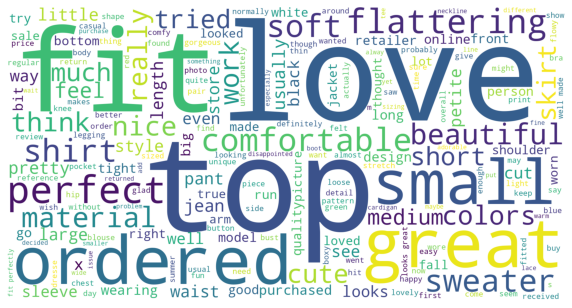

In [ ]:
#concatenar as palavras
all_feedback = ' '.join(s for s in feedback)

#ver quantidades de palavras
print('Quantidade de Palavras: {}'.format(len(all_feedback)))

#lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(['da', 'meu', 'em', 'você', 'de', 'ao', 'os', 'foi' 'mas', 'o', 'it', 'this', 'the', 'was',  'for', 'me', 'you', 'one', 'by', 'and','dress', 'look', 'wear', 'fabric', 'color', 'size','make', 'bought', 'will', 'still', 'back', 'got', 'dressed', 'going'])

#gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords, background_color='white',width = 1900, height = 1000).generate(all_feedback)

#mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation = 'bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);
wordcloud.to_file('airbnb_feedback_wordcloud.png')

